### Importando as bibliotecas 

In [25]:
import pandas as pd 
import numpy as np
from os import path
import matplotlib.pyplot as plt

### Explorando a base de dados 

In [6]:
# função para abrir a base de dados 
def dados(nome):
    diretorio = path.dirname(path.abspath('__file__'))
    arquivo = path.join(diretorio, 'dados', nome)
    return arquivo
# usando a biblioteca pandas para abri a base de dados
df = pd.read_csv(dados('Clean_Dataset.csv'))

### Analise descritiva 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [9]:
# verificando os tipos de dados 
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [10]:
# verificando se a dados nulos na nossa base de dados 
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [18]:
# separando os dados em dados quantitativos e qualitativos
quali = []
quanti = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        quali.append(i)
    else:
        quanti.append(i)
print(f'Minhas variaveis qualitativa {quali}. \nMinhas variaveis quantitativas {quanti}')

# criando um dataframe para as qualitativas e outro para as quantitativas 
df_quali = df[quali]
df_quanti = df[quanti]

Minhas variaveis qualitativa ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']. 
Minhas variaveis quantitativas ['Unnamed: 0', 'duration', 'days_left', 'price']


In [20]:
# essas são as minhas variaveis qualitativas 
df_quali

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business


In [21]:
# essas são as minhas variveis quantitativas 
df_quanti

,Unnamed: 0,duration,days_left,price
0,0,2.17,1,5953
1,1,2.33,1,5953
2,2,2.17,1,5956
3,3,2.25,1,5955
4,4,2.33,1,5955
...,...,...,...,...
300148,300148,10.08,49,69265
300149,300149,10.42,49,77105
300150,300150,13.83,49,79099
300151,300151,10.00,49,81585


In [22]:
# verificando os valores unicos nas minhas variaveis qualitativas
for col in df_quali:
    print(f'Valores unicos na coluna {col}')
    print(f'{df_quali[col].unique()} \n')

Valores unicos na coluna airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'] 

Valores unicos na coluna flight
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'] 

Valores unicos na coluna source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] 

Valores unicos na coluna departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] 

Valores unicos na coluna stops
['zero' 'one' 'two_or_more'] 

Valores unicos na coluna arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'] 

Valores unicos na coluna destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'] 

Valores unicos na coluna class
['Economy' 'Business'] 



In [23]:
# Estatistica descritiva das minhas variaveis quantitativas 
df_quanti.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [24]:
# tabela de frequencia para cada variavel qualitativa 
for i in df_quali.columns:
    print('____________________________________________')
    print(f'Variavel {i}')
    print(df_quali[i].value_counts())

____________________________________________
Variavel airline
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
____________________________________________
Variavel flight
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64
____________________________________________
Variavel source_city
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
____________________________________________
Variavel departure_time
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
__________________________________

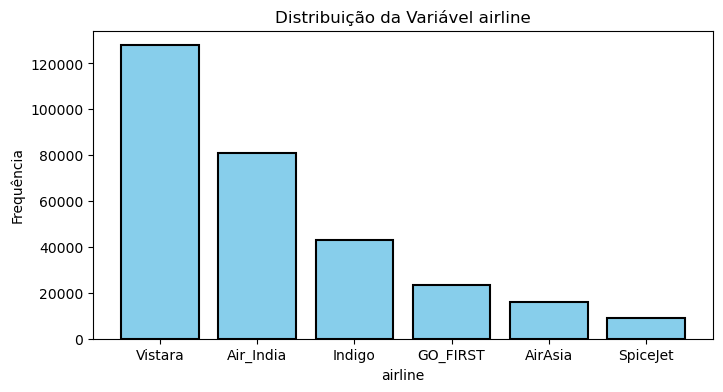

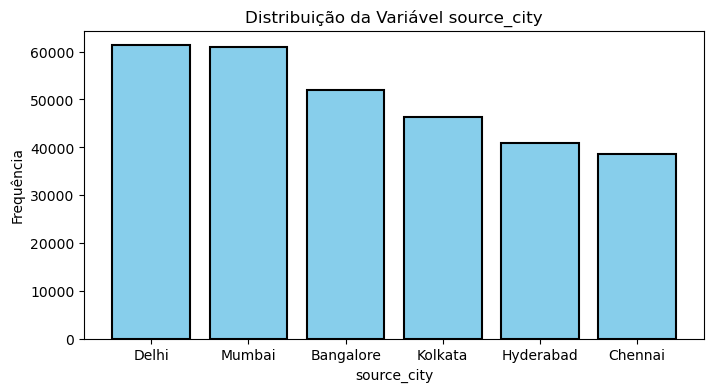

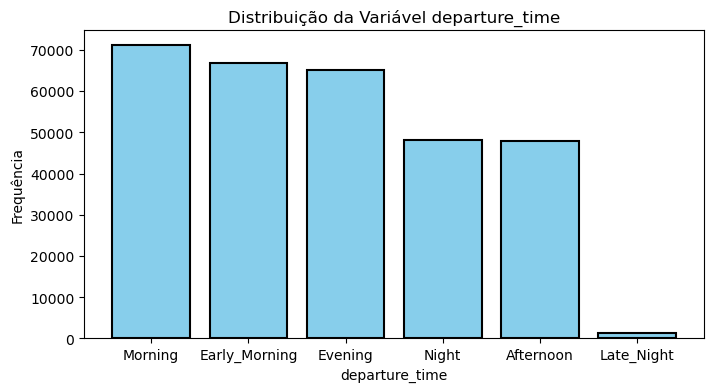

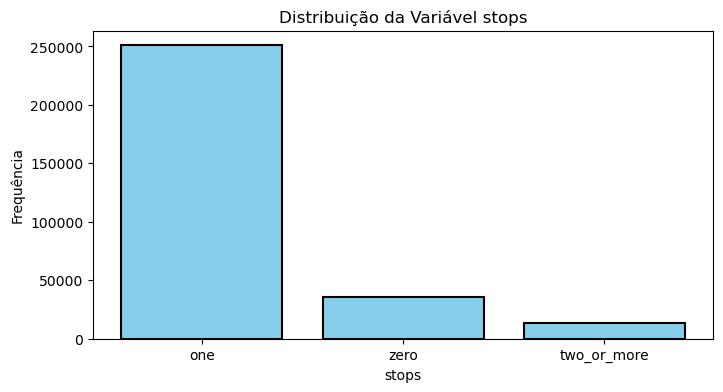

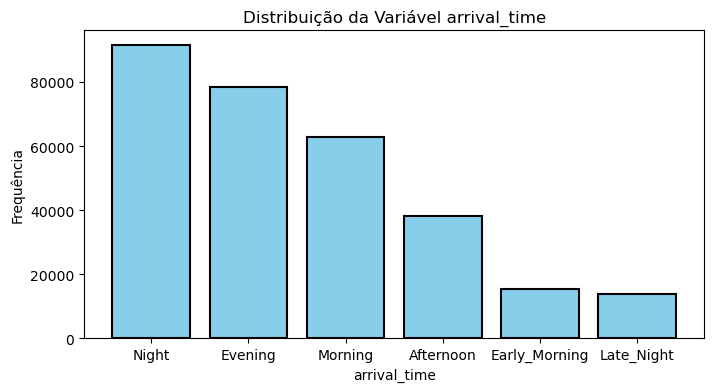

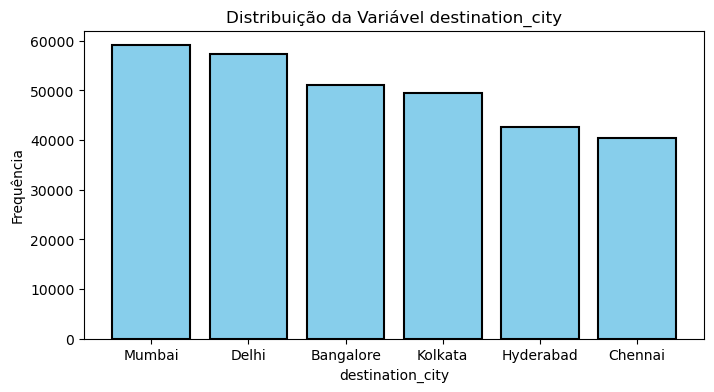

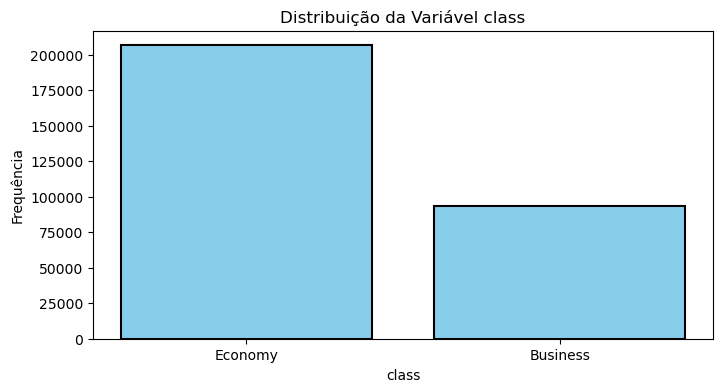

In [33]:
for i in ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']:
    plt.figure(figsize=(8, 4))
    # Obter os valores para o histograma
    valores = df_quali[i].value_counts()
    # Plotar o histograma
    plt.bar(valores.index, valores.values, color='skyblue', edgecolor='black', linewidth=1.5)
    plt.title(f'Distribuição da Variável {i}')
    plt.xlabel(i)
    plt.ylabel('Frequência')
    # Mostrar o gráfico
    plt.show()

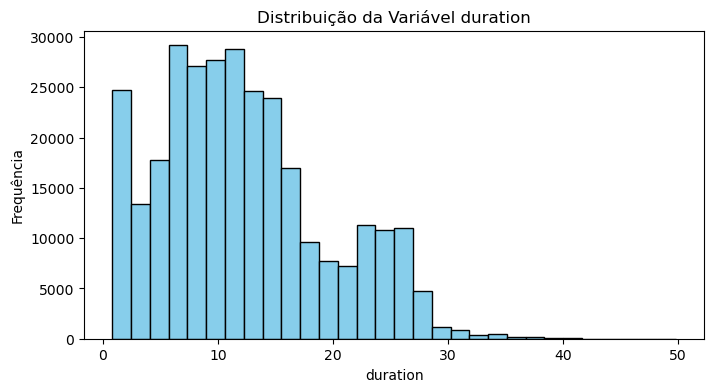

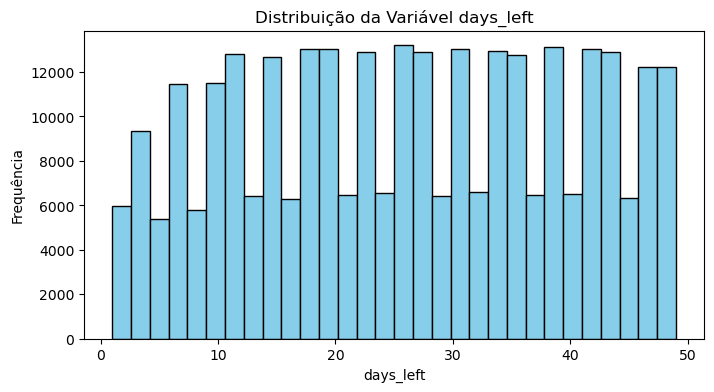

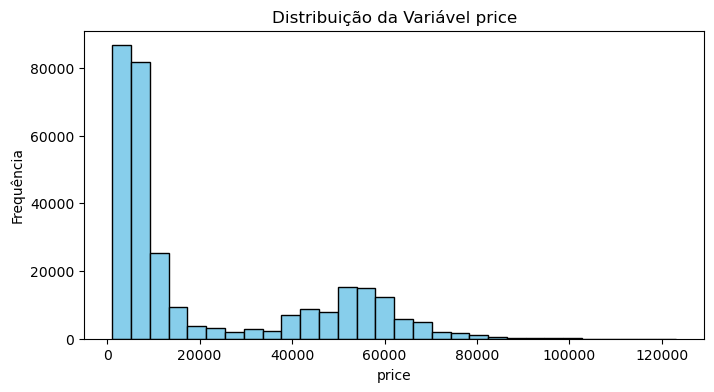

In [28]:
# criando um histogrma para minhas variaveis quantitativas 
for i in df_quanti.iloc[:, 1:4]:
    plt.figure(figsize=(8,4))
    plt.hist(df_quanti[i], bins=30, color='skyblue', edgecolor='black')  # Hist
    plt.title(f'Distribuição da Variável {i}')
    plt.xlabel(i)
    plt.ylabel('Frequência')
    

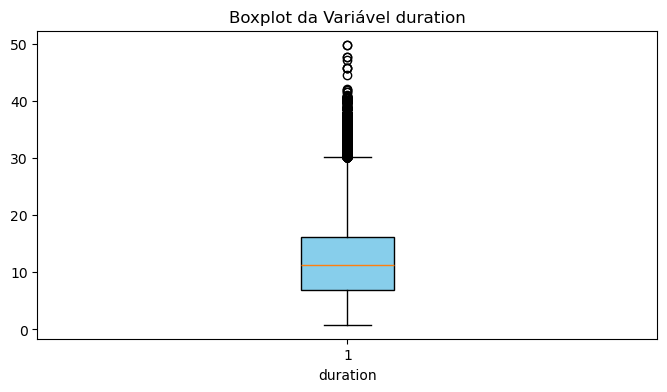

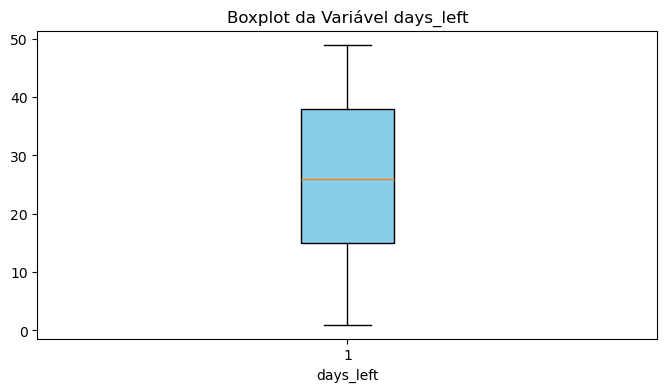

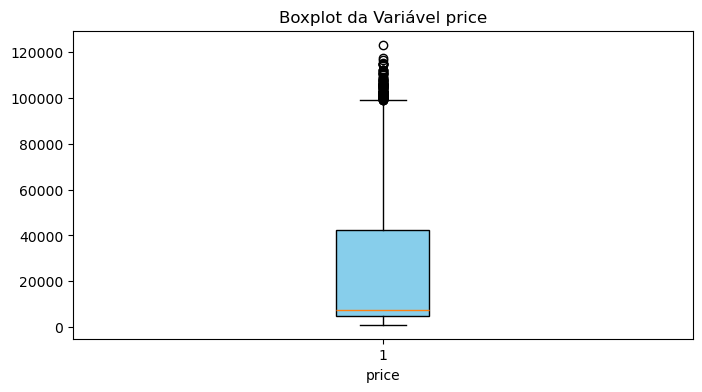

In [34]:
# BOXPLOT
for i in df_quanti.iloc[:, 1:4].columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_quanti[i],  patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Boxplot da Variável {i}')
    plt.xlabel(i)
    plt.show()